# Canciones mas populares de 2019 en Spotify

Dataset sacado de [Kaggle](https://www.kaggle.com/leonardopena/top50spotify2019), al que he añadido algunos de los *featurings* que faltaban en los títulos de las canciones, y añadido el número de artistas en cada canción

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Warning message:
"package 'tibble' was built under R version 3.5.3"
Warning message:
"package 'tidyr' was built under R version 3.5.3"
Warning message:
"package 'readr' was built under R version 3.5.3"
Warning message:
"package 'purrr' was built under R version 3.5.3"
Warning message:
"package 'dplyr' was built under R version 3.5.3"
Warning message:
"package 'stringr' was built under R version 3.5.3"
Warning message:
"package 'forcats' was built under R version 3.5.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    mask

Lo primero, cargar y ver la tabla

In [59]:
all.songs <- read.csv("./top50ext.csv", sep=';')
all.songs

Rank,Track.Name,Artist.Name,Num.Artists,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Señorita (ft. Camila Cabello),Shawn Mendes,2,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China (ft. Daddy Yankee & Ozuna & Karol G & J Balvin,Anuel AA,5,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,2,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,2,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,2,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,2,pop,102,68,80,-5,9,84,220,9,4,84
7,Ransom,Lil Tecca,1,trap music,180,64,75,-6,7,23,131,2,29,92
8,How Do You Sleep?,Sam Smith,1,pop,111,68,48,-5,8,35,202,15,9,90
9,Old Town Road (ft. Billy Ray Cyrus),Lil Nas X,2,country rap,136,62,88,-6,11,64,157,5,10,87


## Preparación de los datos

Lo primero que quiero hacer es generalizar un poco el genero musical, hacer grupos mas amplios.  
Voy a cambiar el nombre de la columna **Genre** por **Syle**  
y despues voy a hacer una nueva de **Genre** con unas etiquetas de genero mas amplio sacadas de **Style**

In [60]:
all.songs$Genre <- as.character(all.songs$Genre)
all.songs <- rename(all.songs, Style = Genre)


In [61]:
head(all.songs, 3L)

Rank,Track.Name,Artist.Name,Num.Artists,Style,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
<int>,<fct>,<fct>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Señorita (ft. Camila Cabello),Shawn Mendes,2,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China (ft. Daddy Yankee & Ozuna & Karol G & J Balvin,Anuel AA,5,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,2,dance pop,190,80,40,-4,16,70,186,12,46,85


In [122]:
# Crear el nuevo campo de "Genre"
all.songs$Genre <- NA

#Introducir valores en 'Genre' funcion de palabras clave en el campo 'Style'
for (i in 1:nrow(all.songs)){
    if (str_detect(all.songs[i,'Style'], "pop")){
        all.songs[i,'Genre'] = "pop"
    } else if (str_detect(all.songs[i,'Style'], "trap")){
        all.songs[i,'Genre'] = "trap"
    } else if (str_detect(all.songs[i,'Style'], "hop")){
        all.songs[i,'Genre'] = "hip hop"
    } else if (str_detect(all.songs[i,'Style'], "rap")){
        all.songs[i,'Genre'] = "hip hop"
    } else if (str_detect(all.songs[i,'Style'], "reggaeton")){
        all.songs[i,'Genre'] = "reggeaton"
    } else if (str_detect(all.songs[i,'Style'], "r&b")){
        all.songs[i,'Genre'] = "r&b"
    }else {all.songs[i,'Genre'] = all.songs[i,5]}
}

In [123]:
all.songs[1:10,c("Style", "Genre")]

Style,Genre
<chr>,<chr>
canadian pop,pop
reggaeton flow,reggeaton
dance pop,pop
pop,pop
dfw rap,hip hop
pop,pop
trap music,trap
pop,pop
country rap,hip hop


In [77]:
head(all.songs, 1)

Rank,Track.Name,Artist.Name,Num.Artists,Style,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Genre
<int>,<fct>,<fct>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Señorita (ft. Camila Cabello),Shawn Mendes,2,canadian pop,117,55,76,-6,8,75,191,4,3,79,pop


In [124]:
#Creo una tabla agrupada por genero, y visualizo algunas de los promedios
songs.bygen <- group_by(all.songs, Genre)
songs.bygen.summ <- summarise(songs.bygen,
          "Number of songs" = n(),
          "Mean number of artists" = mean(Num.Artists),
          "Mean popularity" = mean(Popularity),
          "Mean bpm" = mean(Beats.Per.Minute),
          "Mean length" = mean(Length.),
          "Mean ranking position" = round(mean(Rank),1))
songs.bygen.summ

Genre,Number of songs,Mean number of artists,Mean popularity,Mean bpm,Mean length,Mean ranking position
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
big room,1,3.00000,89.00000,114.00000,164.0000,36.0
boy band,1,1.00000,80.00000,138.00000,181.0000,39.0
brostep,2,2.00000,88.00000,94.00000,198.0000,47.0
edm,3,2.00000,86.66667,97.66667,218.6667,40.3
escape room,1,1.00000,91.00000,158.00000,173.0000,20.0
hip hop,8,1.87500,90.12500,119.37500,173.0000,18.8
latin,5,2.20000,89.80000,126.20000,225.2000,29.4
pop,23,1.73913,85.73913,120.82609,201.6087,23.8
r&b,1,2.00000,88.00000,98.00000,162.0000,45.0


In [125]:
#ggplot no se lleva bien con los nombres de columnas que tienen espacios, asi que:
colnames(songs.bygen.summ) <- sub(" ", "_", colnames(songs.bygen.summ))

Podemos visualizar ya algunos de los promedios agrupados por estilo

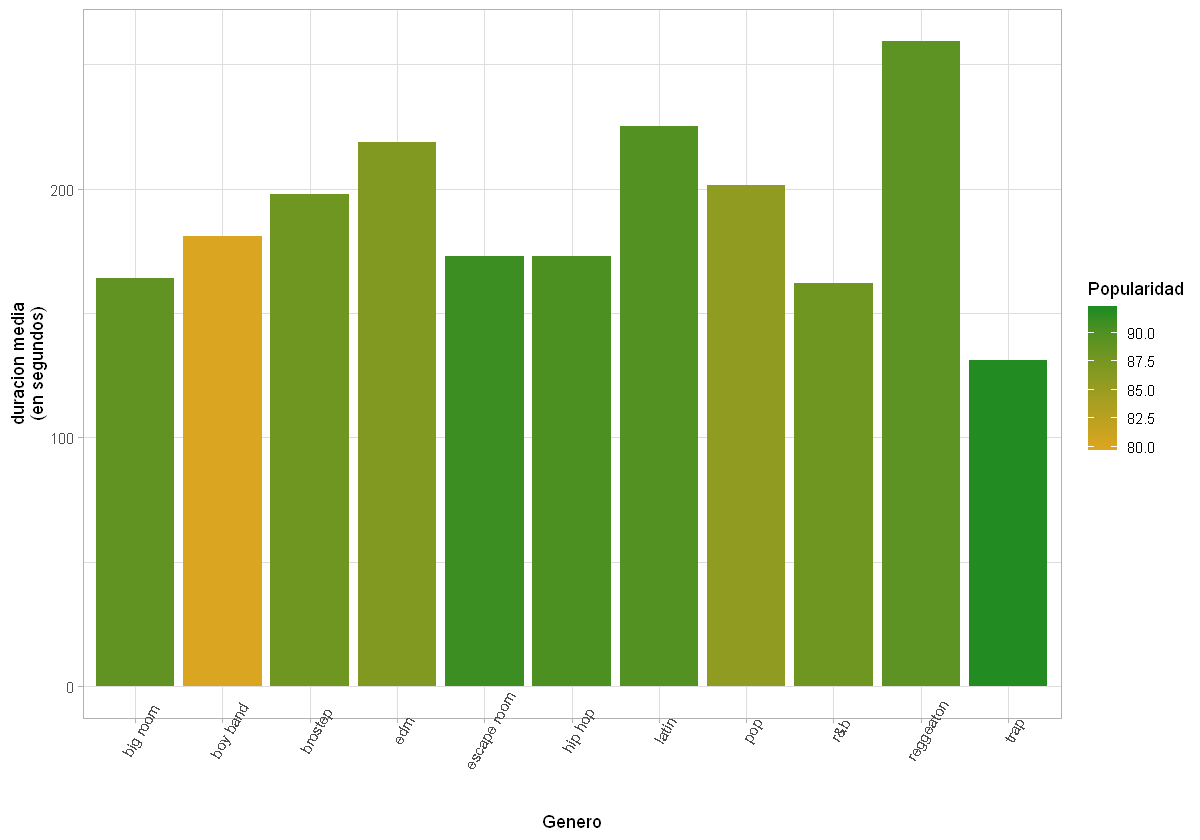

In [147]:
options(repr.plot.width=10, repr.plot.height=7) #cambiar la anchura y altura de los plots
ggplot(songs.bygen.summ, aes(x=Genre, y=Mean_length, fill=Mean_popularity))+
    geom_col()+
    scale_fill_gradient(low="goldenrod", high = "forestgreen")+
    labs(x="Genero", y="duracion media\n(en segundos)", fill="Popularidad")+
    theme_light()+
    theme(axis.text.x = element_text(angle = 60))
    

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



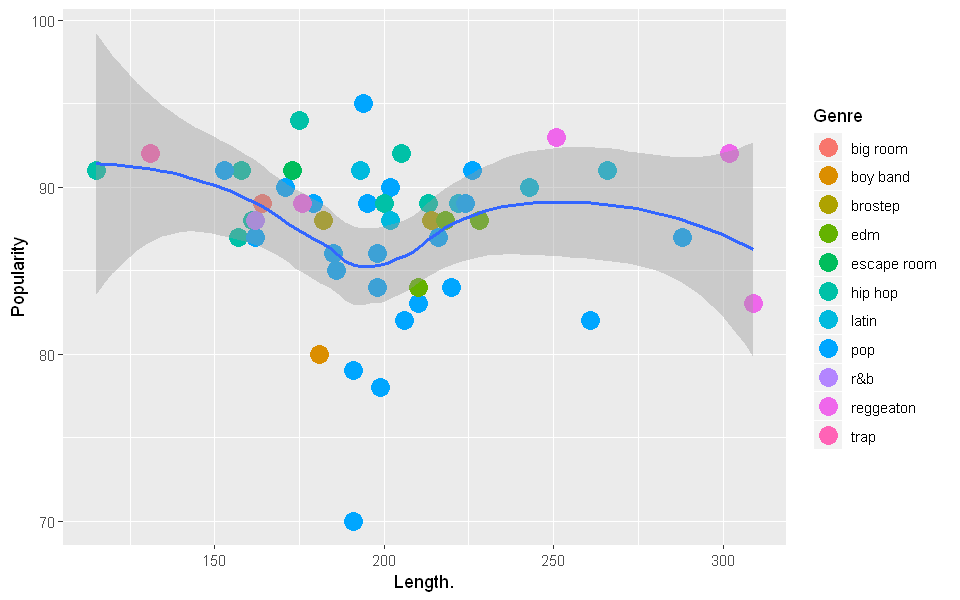

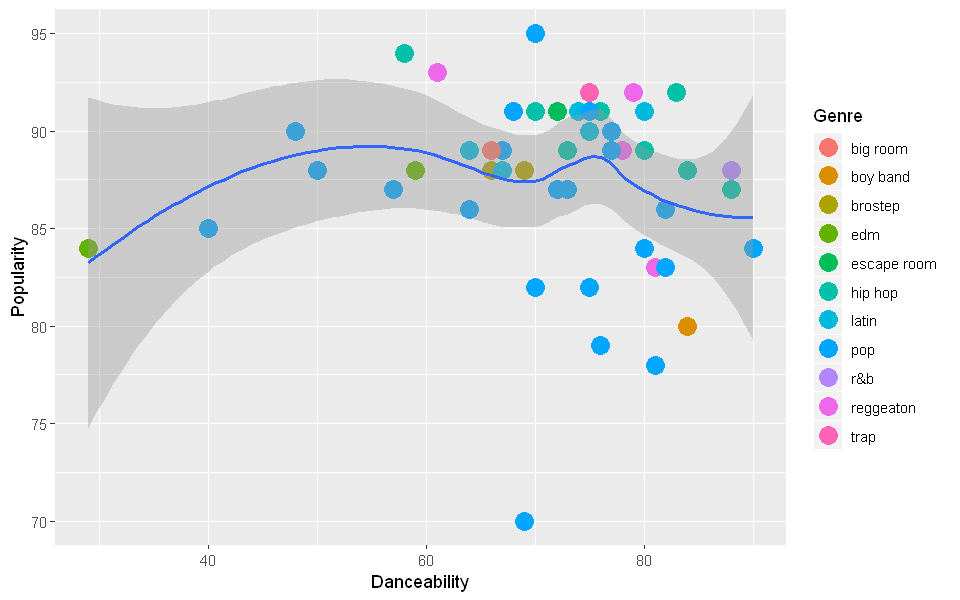

In [164]:
options(repr.plot.width=8, repr.plot.height=5) 
ggplot(all.songs, aes(Length., Popularity))+
    geom_point(aes(color=Genre),size=5)+
    geom_smooth()
ggplot(all.songs, aes(Danceability, Popularity))+
    geom_point(aes(color=Genre),size=5)+
    geom_smooth()

## Explorar relaciones entre variables

Lo primero, crear una matriz de correlaciones.  
Para ello, primero reviso los nombres de las variables (numericas) que me interesan

In [167]:
colnames(all.songs)

[1] "Rank"             "Track.Name"       "Artist.Name"      "Num.Artists"     
 [5] "Style"            "Beats.Per.Minute" "Energy"           "Danceability"    
 [9] "Loudness..dB.."   "Liveness"         "Valence."         "Length."         
[13] "Acousticness.."   "Speechiness."     "Popularity"       "Genre"

Y meto en la funcion *cor* las que quiero, por nombre.

In [191]:
variables.cor <- cor(all.songs[,c('Num.Artists', 'Beats.Per.Minute', 'Energy','Danceability','Loudness..dB..',
                 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Rank', 'Popularity')],
                     method = 'pearson')
round(variables.cor, 3) #mostrar con rendondeo a 3 decimales

,Num.Artists,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Rank,Popularity
Num.Artists,1.000,-0.127,0.338,0.082,0.265,0.007,0.128,0.533,-0.304,-0.118,-0.073,0.033
Beats.Per.Minute,-0.127,1.000,0.044,-0.094,0.017,-0.167,-0.012,-0.139,-0.031,0.557,-0.259,0.196
Energy,0.338,0.044,1.000,0.018,0.671,0.163,0.439,0.225,-0.340,-0.090,0.103,-0.080
Danceability,0.082,-0.094,0.018,1.000,0.016,-0.150,0.173,0.000,-0.098,-0.103,0.123,-0.071
Loudness..dB..,0.265,0.017,0.671,0.016,1.000,0.259,0.238,0.219,-0.138,-0.272,0.012,-0.043
Liveness,0.007,-0.167,0.163,-0.150,0.259,1.000,0.016,0.132,0.021,-0.125,0.271,0.093
Valence.,0.128,-0.012,0.439,0.173,0.238,0.016,1.000,-0.018,-0.052,-0.053,0.137,-0.318
Length.,0.533,-0.139,0.225,0.000,0.219,0.132,-0.018,1.000,-0.076,0.047,-0.066,-0.088
Acousticness..,-0.304,-0.031,-0.340,-0.098,-0.138,0.021,-0.052,-0.076,1.000,0.008,-0.016,-0.035
Speechiness.,-0.118,0.557,-0.090,-0.103,-0.272,-0.125,-0.053,0.047,0.008,1.000,-0.258,0.239


Hay 3 variables que parecen estar más correlancionadas con la popularidad:  
**Valence**, que mide (entre 0 y 100) cómo de alegre es una canción (cor = -0.318)  
**Speechiness** mide (entre 0 y 100) si hay mucho contenido hablado en la canción (cor = 0.239)  
**Beats per minute** o bpm, que indica el tempo de la canción (cor = 0.196)

In [174]:
round(cor(all.songs[,c('Valence.', 'Speechiness.','Beats.Per.Minute', 'Popularity')]), 3)

,Valence.,Speechiness.,Beats.Per.Minute,Popularity
Valence.,1.000,-0.053,-0.012,-0.318
Speechiness.,-0.053,1.000,0.557,0.239
Beats.Per.Minute,-0.012,0.557,1.000,0.196
Popularity,-0.318,0.239,0.196,1.000


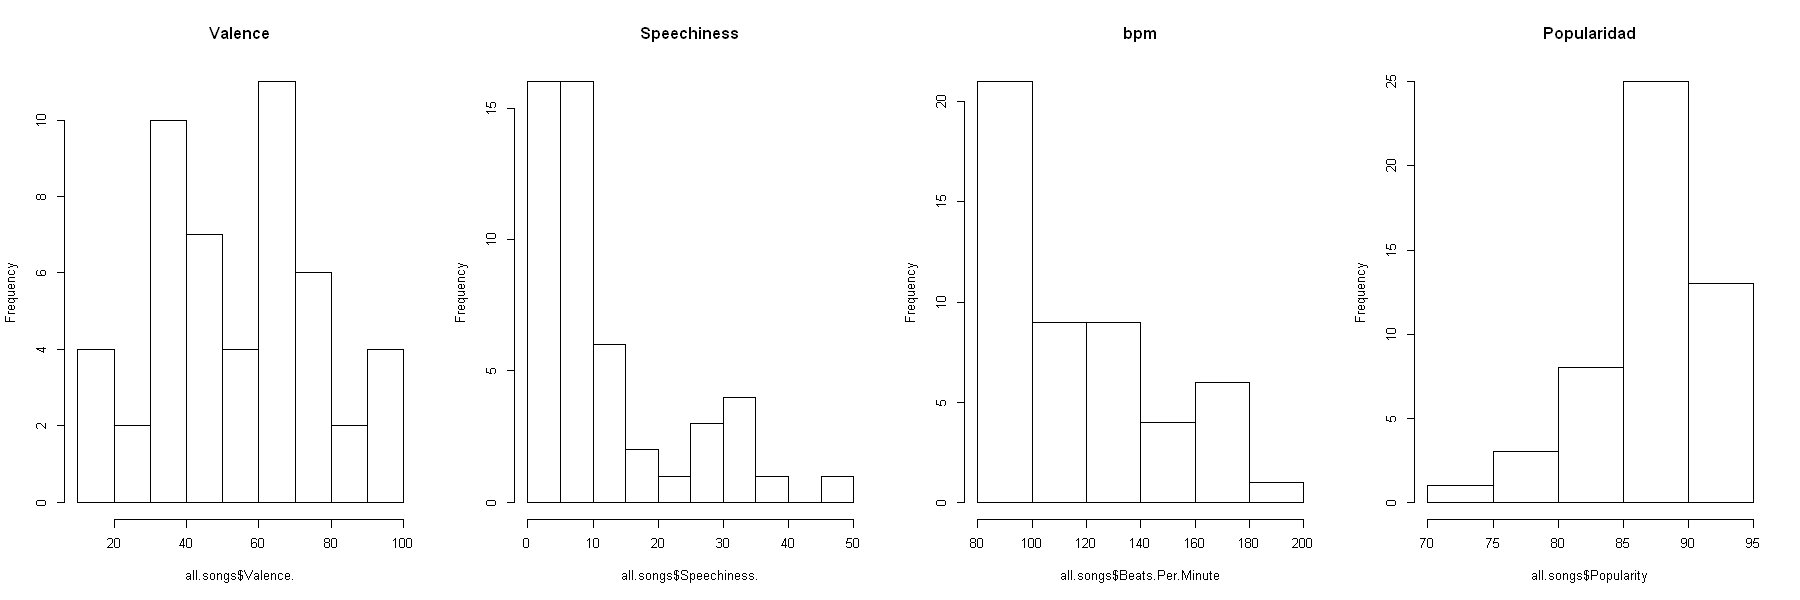

In [176]:
par(mfrow = c(1,4))
options(repr.plot.width=15, repr.plot.height=5)
hist(all.songs$Valence., main = "Valence")
hist(all.songs$Speechiness., main = "Speechiness")
hist(all.songs$Beats.Per.Minute, main = "bpm")
hist(all.songs$Popularity, main = "Popularidad")
par(mfrow = c(1,1))

Se puede explorar graficamente las relaciones de cada una con la popularidad

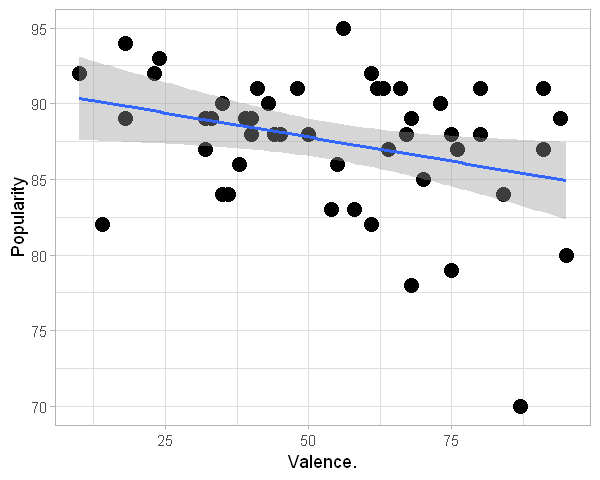

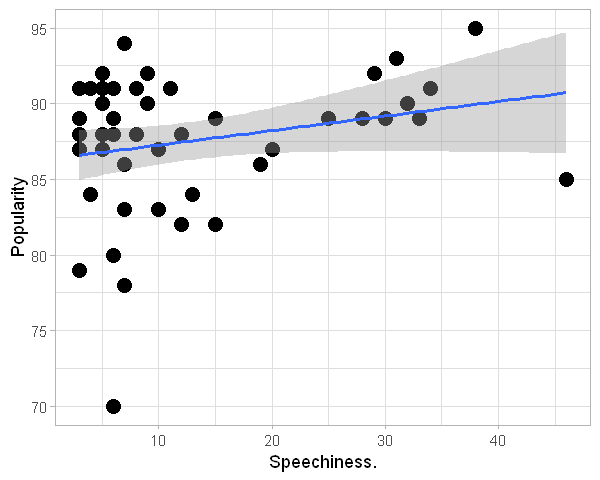

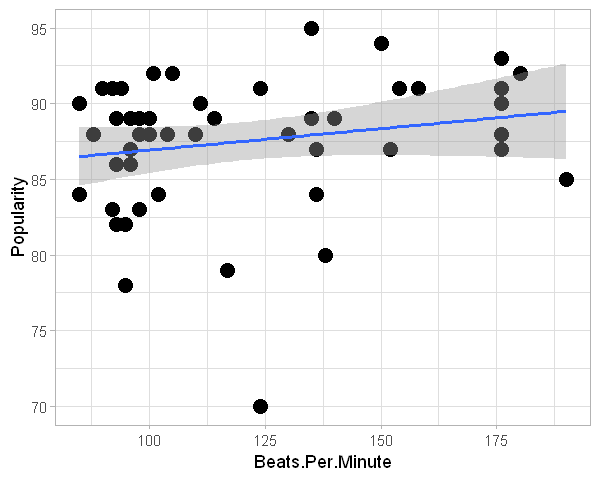

In [179]:
options(repr.plot.width=5, repr.plot.height=4) 
ggplot(all.songs, aes(Valence., Popularity))+
    geom_point(size=4)+
    geom_smooth(method='lm')+
    theme_light()

ggplot(all.songs, aes(Speechiness., Popularity))+
    geom_point(size=4)+
    geom_smooth(method='lm')+
    theme_light()

ggplot(all.songs, aes(Beats.Per.Minute, Popularity))+
    geom_point(size=4)+
    geom_smooth(method='lm')+
    theme_light()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



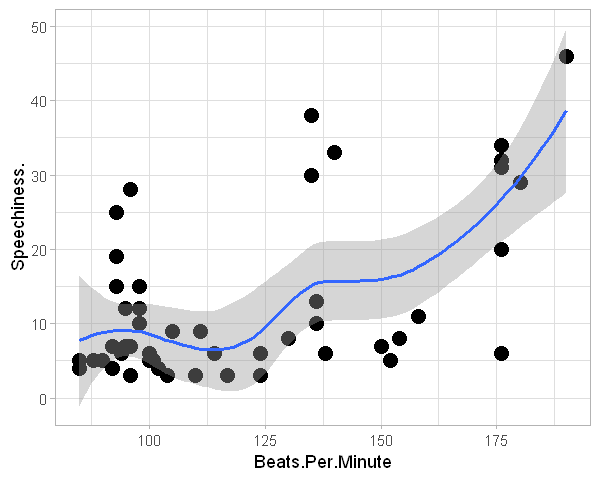

In [187]:
ggplot(all.songs, aes(Beats.Per.Minute, Speechiness.))+
    geom_point(size=4)+
    geom_smooth(method='auto')+
    theme_light()

La pregunta ahora es:  
**¿podemos ajustar un modelo lineal con estas 3 variables para predecir la popularidad?**  


y como extra:  
**¿Se ajustará mejor que uno con todas las variables?**

In [181]:
modelo.simple <- lm(Popularity~Valence.+Speechiness.+Beats.Per.Minute, all.songs)
summary(modelo.simple)


Call:
lm(formula = Popularity ~ Valence. + Speechiness. + Beats.Per.Minute, 
    data = all.songs)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1177  -1.5155   0.7489   2.1006   6.6897 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      88.30161    2.94955  29.937   <2e-16 ***
Valence.         -0.06188    0.02727  -2.270    0.028 *  
Speechiness.      0.06705    0.06570   1.021    0.313    
Beats.Per.Minute  0.01449    0.02370   0.612    0.544    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.256 on 46 degrees of freedom
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1021 
F-statistic: 2.857 on 3 and 46 DF,  p-value: 0.04718


Con este modelo, las variables solo explican un 15% de la variación en popularidad

Ahora, uno con todas las variables numéricas (incluido posición en el ranking y número de artistas)

In [183]:
modelo.completo <- lm(Popularity~Num.Artists+Beats.Per.Minute+Energy+Danceability+Loudness..dB..+Liveness+Valence.+Length.+Acousticness..+Speechiness.+Rank, all.songs)
summary(modelo.completo)


Call:
lm(formula = Popularity ~ Num.Artists + Beats.Per.Minute + Energy + 
    Danceability + Loudness..dB.. + Liveness + Valence. + Length. + 
    Acousticness.. + Speechiness. + Rank, data = all.songs)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0225  -2.0207   0.4144   2.5357   6.3888 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90.937320   9.578419   9.494 1.42e-11 ***
Num.Artists       1.225404   1.004469   1.220   0.2300    
Beats.Per.Minute  0.008499   0.026866   0.316   0.7535    
Energy            0.013212   0.072588   0.182   0.8565    
Danceability      0.016105   0.056309   0.286   0.7764    
Loudness..dB..    0.065822   0.470973   0.140   0.8896    
Liveness          0.076362   0.064269   1.188   0.2421    
Valence.         -0.072381   0.033174  -2.182   0.0354 *  
Length.          -0.030204   0.020537  -1.471   0.1496    
Acousticness..    0.002738   0.037706   0.073   0.9425    
Speechiness.      0.096948 

Este explicaría un 23%, que sigue sin ser mucho.

En realidad, esto es lo esperable, ya que las 50 canciones son relativamente similares muchas de sus caracteristicas,  
y todas ellas son muy populares.  
Para saber qué hace populares a las canciones, necesitariamos incluir tambien otras menos populares.